# Economics Problem Set 1




## Question 1


### 1. State variables:

Stock of oil $S_t$
Price $p_t$

### 2. Control variables:

Amount of oil to sell $x_t$

### 3. Transition equation:

$$S_{t+1} = S_t - x_t$$

### 4. Sequence problem

Max $E_{t}\{\Sigma_{s=1}^{\infty}p_{t+s}x_{t+s}(\frac{1}{1+r})^s) \}$
subject to $S_{t+s+1} = S_{t+s} - x_{t+s}$    $\forall s$ and $S_t = B$ and $S_{t+s} \geqslant 0$

The Bellman equation is of the form:

$$V(S) = Max_x\{px + \frac{1}{1+r} V(S - x)\}$$

### 5. The Euler equation

$$p_{t+s} = p_{t+1+s}(\frac{1}{1+r})$$

### 6. The solution

Since the payoff function is linear, the solution is piecewise.

If $p_{t+1+s} = p_{t+s}$ for all s, then $x_t = B$, i.e. we sell everything today. This is because we get the same absolute payoff from selling a marginal unit in any period, but we discount the future, so we sell everything today.

If $p_{t+1+s} > (1+r)p_{t+s}$ then $x_{t+s} = 0$ for all s. This is actually a violation of the transversality condition, and so the model is not stationary in this case.

A necessary condition for an interior solution is $p_{t+s}(1+r) = p_{t+s+1}$


## Question two

### 1. State variables:

Capital today: $k_t$
Shock today: $z_t$

### 2. Control variables:

Consumption today: $c_t$

### 3. Bellman Equation:

$$V(z_t, k_t) = Max_c\{U(C_{t}) + \beta E_tV(z_{t+1}, k_{t+1})\}$$

subject to the resource contraint:

$$k_{t+1} + c_{t} = z_{t}k_{t}^\alpha + (1-\delta)k_{t}$$



### Import some packages

In [4]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\sigma_z$ : Standard dev of productivity shocks
* $\mu$ : Centre of log normal distribution
* $\rho$ : Persistence parameter


In [42]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigmaz = 0.2
mu = 0
rho = 0

### Create Grid Space

In [32]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 60  # Number of grid points of k
size_z = 60 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigmaz)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)



In [33]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999


### Value function iteration

In [34]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance', VFdist, VFiter)
    for i in range(size_k): # loop over k_t
        for j in range(size_k): # loop over k_t+1
            for q in range(size_z): #loop over z_t
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

This is the distance 7.0 1
This is the distance 5.2679396139508 2
This is the distance 3.090559199888121 3
This is the distance 2.8002506796346065 4
This is the distance 2.616099018915172 5
This is the distance 2.4819149199332333 6
This is the distance 2.369442806890804 7
This is the distance 2.267673183988652 8
This is the distance 2.172857395717461 9
This is the distance 2.0833540823576087 10
This is the distance 1.9983072808102307 11
This is the distance 1.9172031866428512 12
This is the distance 1.8396868204592671 13
This is the distance 1.7655013414361989 14
This is the distance 1.6944451582581088 15
This is the distance 1.6263428928414 16
This is the distance 1.5610464470134104 17
This is the distance 1.498419486504062 18
This is the distance 1.4383416836174803 19
This is the distance 1.38070064872759 20
This is the distance 1.325389435705162 21
This is the distance 1.2723095460721368 22
This is the distance 1.2213672397096218 23
This is the distance 1.1724735127413197 24
This is

This is the distance 0.0015739042861042662 186
This is the distance 0.0015109481146424741 187
This is the distance 0.0014505101900397221 188
This is the distance 0.0013924897824892923 189
This is the distance 0.0013367901911749414 190
This is the distance 0.0012833185835319227 191
This is the distance 0.0012319858401781403 192
This is the distance 0.0011827064065812465 193
This is the distance 0.0011353981503248178 194
This is the distance 0.0010899822243004564 195
This is the distance 0.0010463829353568599 196
This is the distance 0.0010045276179369012 197
This is the distance 0.0009643465132143092 198
This is the distance 0.000925772652692558 199
This is the distance 0.0008887417465928138 200
This is the distance 0.0008531920767325119 201
This is the distance 0.0008190643936671904 202
This is the distance 0.0007863018179108394 203
This is the distance 0.0007548497451921321 204
This is the distance 0.000724655755391268 205
This is the distance 0.0006956695251858491 206
This is the dis

This is the distance 1.348657477251436e-06 359
This is the distance 1.2947111542871426e-06 360
This is the distance 1.242922735400498e-06 361
This is the distance 1.1932058185948335e-06 362
This is the distance 1.1454775687980145e-06 363
This is the distance 1.099658490488764e-06 364
This is the distance 1.0556721292687143e-06 365
This is the distance 1.013445256603518e-06 366
Value function converged after this many iterations: 367


<Figure size 432x288 with 0 Axes>

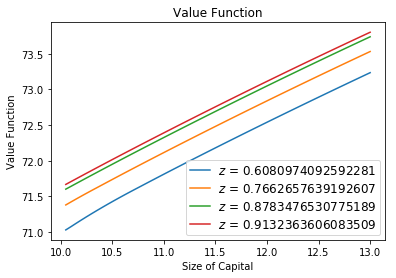

In [38]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

<Figure size 432x288 with 0 Axes>

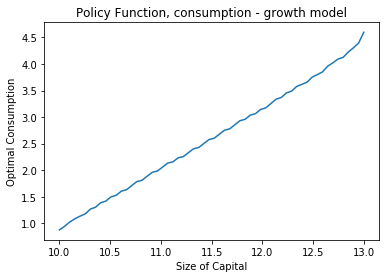

In [39]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][18], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - growth model')
plt.show()


<Figure size 432x288 with 0 Axes>

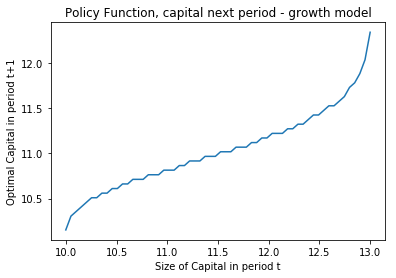

In [41]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period - growth model')
plt.show()



## Question 3

### The Bellman equation

$$V(z_t, k_t) = Max_c\{U(C_{t}) + \beta E_{z_{t+1} | z_t} V(z_{t+1}, k_{t+1})\}$$

subject to the resource contraint:

$$k_{t+1} + c_{t} = z_{t}k_{t}^\alpha + (1-\delta)k_{t}$$

### Set Parameters

Parameters:
* $\gamma$ : Coefficient of Relative Risk Aversion
* $\beta$ : Discount factor
* $\delta$ : Rate of depreciation
* $\alpha$ : Curvature of production function
* $\sigma_v$ : Standard deviation of iid shock to log z
* $\rho$ : Persistence parameter
* $\sigma_v$: stdev of iid shock

In [62]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma_v = 0.1
mu = 0
rho = 0.8

### Create Grid Space

In [63]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital and Shock
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
lb_k = 10
ub_k = 13
size_k = 30  # Number of grid points of k
size_z = 30 # Number of grid points of z
k_grid = np.linspace(lb_k, ub_k, size_k)

import ar1_approx as ar1
ln_z_grid, pi = ar1.addacooper(size_z, mu, rho, sigma_v)
z_grid = np.exp(ln_z_grid)
pi_z = np.transpose(pi)


In [61]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^a - k_t+1 + (1-delta)k_t)
U        = matrix, current period utility value for all possible
           choices of k and k'
------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z))
for i in range(size_k): # loop over k_t
    for j in range(size_k): # loop over k_t+1
        for q in range(size_z): #loop over z_t
            C[i, j, q] = z_grid[q]* k_grid[i]**alpha + (1 - delta)*k_grid[i] - k_grid[j]
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 1e-15
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999


### Value function iteration

In [51]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-6 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance', VFdist, VFiter)
    for i in range(size_k): # loop over k_t
        for j in range(size_k): # loop over k_t+1
            for q in range(size_z): #loop over z_t
                EV = 0
                for qq in range(size_z):
                    EV += pi_z[q, qq]*V[j, qq]
                Vmat[i, j, q] = U[i, j, q] + beta * EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

This is the distance 7.0 1
This is the distance 5.057120757426964 2
This is the distance 3.4330013950434344 3
This is the distance 3.1229691910173827 4
This is the distance 2.899127801173254 5
This is the distance 2.713649201705291 6
This is the distance 2.551092898737817 7
This is the distance 2.4081503578423877 8
This is the distance 2.280575314366004 9
This is the distance 2.165365955434684 10
This is the distance 2.0603056054400497 11
This is the distance 1.9636930909476646 12
This is the distance 1.8742015930709712 13
This is the distance 1.7907913130546333 14
This is the distance 1.7126404255388366 15
This is the distance 1.6390948514655364 16
This is the distance 1.5696308133380654 17
This is the distance 1.503824401505419 18
This is the distance 1.4413279753269634 19
This is the distance 1.3818544620585769 20
This is the distance 1.3251645447882368 21
This is the distance 1.271055779247206 22
This is the distance 1.219354641123978 23
This is the distance 1.1699104712785555 24
T

This is the distance 0.0015667374042891424 186
This is the distance 0.001504067908115303 187
This is the distance 0.0014439051918060386 188
This is the distance 0.001386148984138913 189
This is the distance 0.0013307030247773355 190
This is the distance 0.0012774749037589572 191
This is the distance 0.001226375907620536 192
This is the distance 0.0011773208713492522 193
This is the distance 0.001130228036501535 194
This is the distance 0.0010850189150062306 195
This is the distance 0.0010416181584105288 196
This is the distance 0.0009999534320996872 197
This is the distance 0.000959955294817405 198
This is the distance 0.0009215570830178876 199
This is the distance 0.0008846947997085408 200
This is the distance 0.0008493070077122411 201
This is the distance 0.0008153347274344469 202
This is the distance 0.0007827213383535536 203
This is the distance 0.0007514124848171377 204
This is the distance 0.0007213559853909146 205
This is the distance 0.0006925017459735727 206
This is the distan

This is the distance 1.2888156106782844e-06 360
This is the distance 1.2372629782930744e-06 361
This is the distance 1.187772497246442e-06 362
This is the distance 1.1402615740507827e-06 363
This is the distance 1.0946511110887513e-06 364
This is the distance 1.0508650944984765e-06 365
This is the distance 1.0088304520650127e-06 366
Value function converged after this many iterations: 367


<Figure size 432x288 with 0 Axes>

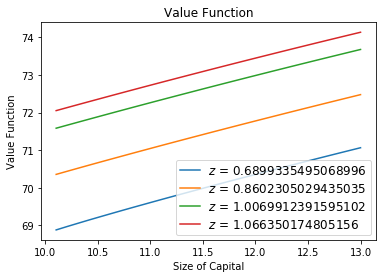

In [52]:
# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

<Figure size 432x288 with 0 Axes>

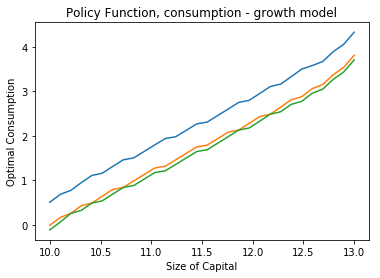

In [55]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][12], label='Consumption')
ax.plot(k_grid[:], optC[:][18], label='Consumption')
ax.plot(k_grid[:], optC[:][19], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - growth model')
plt.show()

<Figure size 432x288 with 0 Axes>

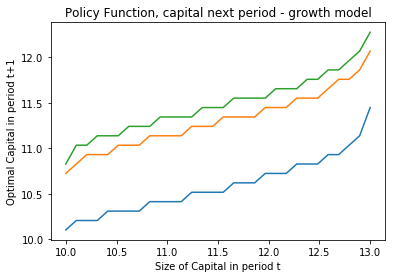

In [56]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][4], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][12], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][14], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period - growth model')
plt.show()

## Question 4

## 1. Bellman Equation:

$$V(w) = Max\{V^U(w), V^J(w)\}$$
where:
$$V^U(w)= b + \beta E V(w)$$
and
$$V^J(w) = E_0 \sum_{t=0}^{\infty} \beta^t w = \frac{w}{1 - \beta} $$

In [2]:
# Declare parameters
# Preference parameters
beta = 0.96
b = 0.05
# Taste shock parameters: AR(1) process:
mu = 0
sigma = .15
size_w = 100
rho = 0

In [5]:
'''
------------------------------------------------------------------------
Create Grid for State Space
------------------------------------------------------------------------
ub_w      = scalar, upper bound grid
size_w    = integer, number of grid points in state space
w_grid    = vector, size_w x 1 vector of grid points
------------------------------------------------------------------------
'''

import ar1_approx as ar1
ln_w_grid, pi_t = ar1.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_t)

In [6]:
'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''
U = np.zeros(size_w) 
for i in range(size_w): # loop over w
        U[i] = (w_grid[i])/(1-beta)


In [7]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
PF_discrete = matrix, matrix of policy function: eat=1, not eat=0 
Vstore      = array, stores V at each iteration 
VFiter      = integer, current iteration number
EV          = scalar, expected value function for a given state
U_eat       = matrix, utility from eating cake now
Vwait       = matrix, value of waiting to eat the cake
VF          = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros(size_w)
PF_discrete = np.zeros(size_w)
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance', VFdist, VFiter)
    for i in range(size_w): # loop over w
        EV = 0
        for ii in range(size_w):  # loop over w
            EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
        U_emp = U[i]
        Vun = b + beta * EV 
        TV[i] = max(U_emp, Vun)
        PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
    Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3


### Threshold

In [8]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.0327303478475856


<Figure size 432x288 with 0 Axes>

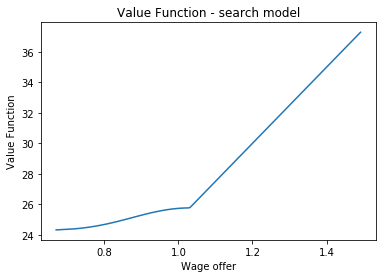

In [11]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:])
# Set the fontsize
plt.xlabel('Wage offer')
plt.ylabel('Value Function')
plt.title('Value Function - search model')
plt.show()

In [12]:
#Set grid of b
grid_b = np.linspace(0.05, 1, 20)
threshold_vec = np.zeros(20)

#Begin for loop
for q in range(20):

    VFtol = 1e-8 
    VFdist = 7.0 
    VFmaxiter = 500 
    V = np.zeros(size_w) # initial guess at value function
    TV = np.zeros(size_w)
    PF_discrete = np.zeros(size_w)
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:
        print('This is the distance', VFdist, VFiter)
        for i in range(size_w): # loop over w
            EV = 0
            for ii in range(size_w):  # loop over w
                EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
            U_emp = U[i]
            Vun = grid_b[q] + beta * EV 
            TV[i] = max(U_emp, Vun)
            PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        VFiter += 1 

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')            


    VF = V # solution to the functional equation
    threshold_vec[q]=w_grid[np.argmax(PF_discrete)]

This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 37.28749284375401 2
Value function converged after this many iterations: 3
This is the dist

In [13]:
print(threshold_vec)

[1.03273035 1.03672313 1.04075636 1.04483344 1.04483344 1.048958
 1.05313387 1.05736513 1.06165615 1.0660116  1.07043651 1.07493631
 1.07493631 1.07951689 1.08418465 1.0889466  1.09381039 1.09878449
 1.09878449 1.10387824]


<Figure size 432x288 with 0 Axes>

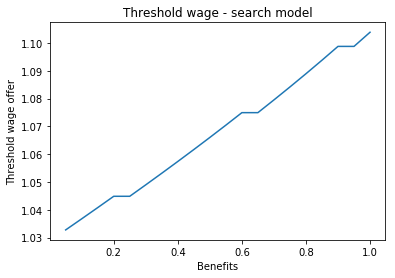

In [15]:
# Plot resevation wage as function of benefits 
plt.figure()
fig, ax = plt.subplots()
ax.plot(grid_b[:], threshold_vec[:])
# Set the fontsize
plt.xlabel('Benefits')
plt.ylabel('Threshold wage offer')
plt.title('Threshold wage - search model')
plt.show()